# Quick Start

In [155]:
import pandas as pd
import xarray as xr

## List available datasets
To view available datasets, you can use the `list_datasets` function.

In [156]:
from pyrregular import list_datasets

In [157]:
print(list_datasets())

['Abf.h5', 'Ais.h5', 'AllGestureWiimoteX.h5', 'AllGestureWiimoteY.h5', 'AllGestureWiimoteZ.h5', 'Animals.h5', 'AsphaltObstaclesCoordinates.h5', 'AsphaltPavementTypeCoordinates.h5', 'AsphaltRegularityCoordinates.h5', 'CharacterTrajectories.h5', 'CombinedTrajectories.h5', 'DodgerLoopDay.h5', 'DodgerLoopGame.h5', 'DodgerLoopWeekend.h5', 'Garment.h5', 'Geolife.h5', 'GeolifeSupervised.h5', 'GestureMidAirD1.h5', 'GestureMidAirD2.h5', 'GestureMidAirD3.h5', 'GesturePebbleZ1.h5', 'GesturePebbleZ2.h5', 'JapaneseVowels.h5', 'Ldfpa.h5', 'MelbournePedestrian.h5', 'Mimic3.h5', 'PLAID.h5', 'Pamap2.h5', 'Physionet2012.h5', 'Physionet2019.h5', 'PickupGestureWiimoteZ.h5', 'Seabirds.h5', 'ShakeGestureWiimoteZ.h5', 'SpokenArabicDigits.h5', 'TDrive.h5', 'Taxi.h5', 'Vehicles.h5']


## Loading the dataset from the online repository
Loading a dataset is as from the online repo (https://huggingface.co/datasets/splandi/pyrregular) is as simple as calling the `load_dataset` function with the dataset name.

In [158]:
from pyrregular import load_dataset

In [159]:
ds = load_dataset("Garment.h5")

The dataset is loaded as an xarray dataset.
The dataset is saved in the default os cache directory, which can be found with:

```python
import pooch
print(pooch.os_cache("pyrregular"))
```

You can also use xarray to directly load a local file. In this case, you have to specify our backend as `pyrregular` in the `engine` argument.

```python
import xarray as xr
ds = xr.load_dataset("path/to/file.h5", engine="pyrregular")
```



You can view the underlying DataArray by calling the `data` variable.

In [160]:
da = ds.data

In [161]:
da

Format,coo
Data Type,float64
Shape,"(24, 9, 59)"
nnz,10267
Density,0.8056340238543629
Read-only,True
Size,320.8K
Storage ratio,3.22


In [162]:
# the shape is (n_time_series, n_channels, n_timestamps)
da.shape

(24, 9, 59)

In [163]:
# the array is stored as a sparse array
da.data

Format,coo
Data Type,float64
Shape,"(24, 9, 59)"
nnz,10267
Density,0.8056340238543629
Read-only,True
Size,320.8K
Storage ratio,3.22


In [164]:
# dimensions contain the time series ids, signal ids and timestamps
da.dims

('ts_id', 'signal_id', 'time_id')

In [165]:
# e.g., these are the time series ids
da["ts_id"].data

array(['finishing_1', 'finishing_10', 'finishing_11', 'finishing_12',
       'finishing_2', 'finishing_3', 'finishing_4', 'finishing_5',
       'finishing_6', 'finishing_7', 'finishing_8', 'finishing_9',
       'sweing_1', 'sweing_10', 'sweing_11', 'sweing_12', 'sweing_2',
       'sweing_3', 'sweing_4', 'sweing_5', 'sweing_6', 'sweing_7',
       'sweing_8', 'sweing_9'], dtype='<U12')

In [166]:
# there are also static variables, such as the class
da["productivity_binary"].data

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1], dtype=int32)

In [167]:
# the train/test split
da["split"].data

array(['train', 'train', 'test', 'train', 'train', 'test', 'train',
       'train', 'train', 'test', 'train', 'train', 'test', 'train',
       'train', 'test', 'train', 'train', 'train', 'train', 'test',
       'train', 'train', 'train'], dtype='<U5')

In [168]:
# all the coordinates can be accessed via the `coords` variable
da.coords

Coordinates:
    day                     (time_id) <U9 2kB 'Thursday' ... 'Wednesday'
    department              (ts_id) <U9 864B 'finishing' ... 'sweing'
    productivity_binary     (ts_id) int32 96B 1 0 1 1 1 1 1 1 ... 1 1 0 0 0 0 1
    productivity_class      (ts_id) <U4 384B 'high' 'low' ... 'low' 'high'
    productivity_numerical  (ts_id) float32 96B 0.8126 0.6283 ... 0.7005 0.7503
    quarter                 (time_id) <U8 2kB 'Quarter1' ... 'Quarter2'
  * signal_id               (signal_id) <U21 756B 'idle_men' ... 'wip'
    split                   (ts_id) <U5 480B 'train' 'train' ... 'train' 'train'
    team                    (ts_id) int32 96B 1 10 11 12 2 3 4 ... 3 4 5 6 7 8 9
  * time_id                 (time_id) datetime64[ns] 472B 2015-01-01T01:00:00...
  * ts_id                   (ts_id) <U12 1kB 'finishing_1' ... 'sweing_9'

In [169]:
# metadata contains informations about the datasets and tasks
da.attrs

{'_fixed_at': '2024-12-04T21:50:44.408790-12:00',
 '_is_fixed': True,
 'author': ['NA'],
 'configs': {'default': {'task': 'classification',
   'split': 'split',
   'target': 'productivity_binary'},
  'regression': {'task': 'regression',
   'split': 'split',
   'target': 'productivity_numerical'}},
 'license': 'CC BY 4.0',
 'source': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees',
 'title': 'Productivity Prediction of Garment Employees'}

## Data Handling and Plotting
Data can be accessed with standard xarray methods.

In [170]:
import matplotlib.pyplot as plt
import numpy as np

In [171]:
# the first time series
da[0]

Format,coo
Data Type,float64
Shape,"(9, 59)"
nnz,392
Density,0.7382297551789078
Read-only,True
Size,9.2K
Storage ratio,2.21


In [172]:
# the first channel of the first time series
da[0, 0]

Format,coo
Data Type,float64
Shape,"(59,)"
nnz,49
Density,0.8305084745762712
Read-only,True
Size,784
Storage ratio,1.66


In [173]:
# to access the underlying sparse vector
da[0, 0].data

Format,coo
Data Type,float64
Shape,"(59,)"
nnz,49
Density,0.8305084745762712
Read-only,True
Size,784
Storage ratio,1.66


In [174]:
# to access the underlying dense vector
da[0, 4].data.todense()

array([ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  2.,  8.,  8.,
        8., nan, nan, nan,  8., 25.,  8.,  8., 10., 10., 10., 10., 15.,
       19., 19., 10., 10., 12., 10., 10., 10., 12., 12., 12., 12.,  8.,
       nan, nan, nan, nan, 12., nan, nan, nan,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.])

In [175]:
# this vector contains a lot of nans, which are the padding necessary to have shared timestamps w.r.t. the whole dataset
np.isnan(da[0, 4].data.todense()).sum()

10

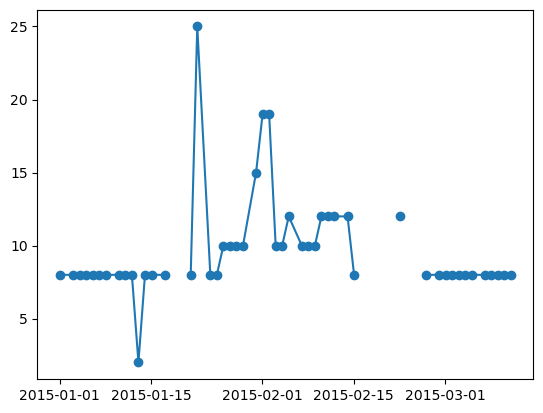

In [176]:
plt.plot(da[0, 4]["time_id"], da[0, 4], marker="o")

In [177]:
# using the custom ".irr" accessor, we can filter out the nans to the minimum amount possible due to raggedness
np.isnan(da.irr[0, 4].data.todense()).sum()

0

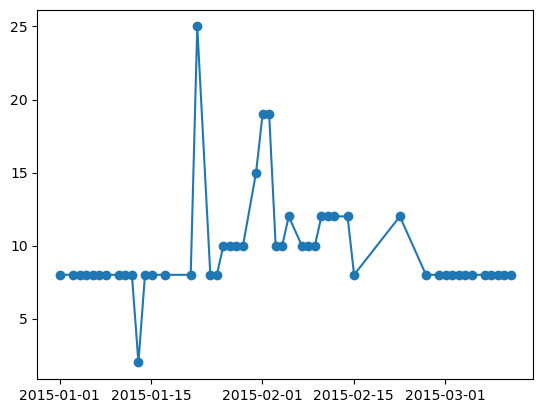

In [178]:
plt.plot(da.irr[0, 4]["time_id"], da.irr[0, 4], marker="o")

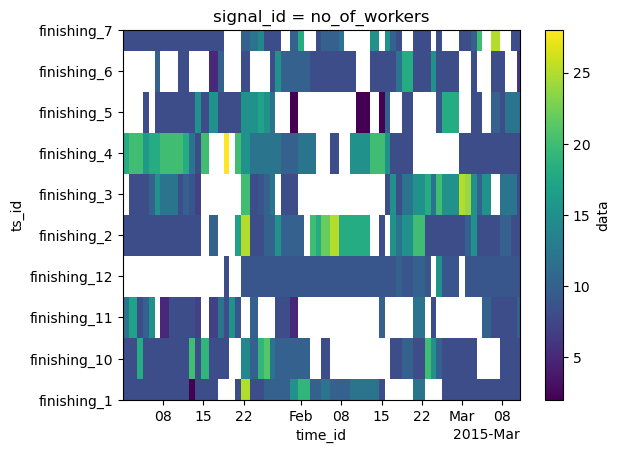

In [179]:
# the fourth channel first 10 time series of the dataset, as a heatmap
da.irr[:10, 4].plot()

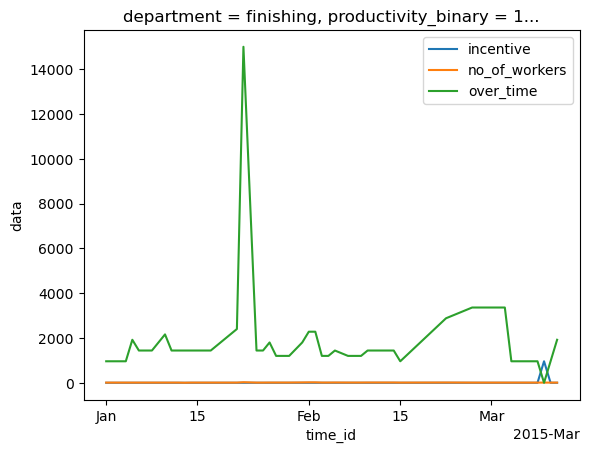

In [180]:
# plotting some channels
da.irr[0, 2].plot(label=da.coords["signal_id"][2].item())
da.irr[0, 4].plot(label=da.coords["signal_id"][4].item())
da.irr[0, 5].plot(label=da.coords["signal_id"][5].item())
plt.legend()

## Downstream Tasks
The xarray is nice, but not supported by basically any downstream library. Thus, we can convert it into a numpy array.

In [181]:
%%time
# time series data, timestamps
X, T = da.irr.to_dense(
    normalize_time=True,  # normalize the time index to [0, 1]
)

CPU times: user 14.9 ms, sys: 1.57 ms, total: 16.4 ms
Wall time: 5.14 ms


In [182]:
# the shape is (n_time_series, n_channels, n_timestamps), timestamps are returned as a separate channel, for downstream methods that are able to use them
X.shape, T.shape

((24, 9, 59), (24, 1, 59))

In [183]:
# static variables
Z = da.coords.to_dataset()[["split", "productivity_binary"]].to_pandas()
Z.head()

,split,productivity_binary,department,productivity_class,productivity_numerical,team
ts_id,,,,,,
finishing_1,train,1,finishing,high,0.812625,1
finishing_10,train,0,finishing,low,0.628333,10
finishing_11,test,1,finishing,high,0.874028,11
finishing_12,train,1,finishing,high,0.922840,12
finishing_2,train,1,finishing,high,0.819271,2


In [184]:
# target and split
y, split = da.irr.get_task_target_and_split()

### Train-test split

In [185]:
X_train, X_test = X[split != "test"], X[split == "test"]
y_train, y_test = y[split != "test"], y[split == "test"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18, 9, 59), (18,), (6, 9, 59), (6,))

### Classification
We have several ready-to-use classifiers in the `pyrregular` package. Be sure to install the required dependencies.

In [186]:
from pyrregular.models.rocket import rocket_pipeline

In [187]:
%%time
model = rocket_pipeline
model.fit(X_train, y_train)
model.score(X_test, y_test)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.


/Users/francesco/miniforge3/envs/timeseries_dl/lib/python3.12/site-packages/sktime/base/_base_panel.py:307: UserWarning: Data seen by SklearnClassifierPipeline instance has missing values, but this SklearnClassifierPipeline instance cannot handle missing values. Calls with missing values may result in error or unreliable results.
  warn(msg, obj=self)
/Users/francesco/miniforge3/envs/timeseries_dl/lib/python3.12/site-packages/sktime/transformations/base.py:512: UserWarning: X is of equal length, consider using MiniRocketMultivariate for speedup and stability instead.
  self._fit(X=X_inner, y=y_inner)
/Users/francesco/miniforge3/envs/timeseries_dl/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11, number of negative: 7
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.611111 -> initscore=0.451985
[LightGBM] [Info] Start training from score 0.451985
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

/Users/francesco/miniforge3/envs/timeseries_dl/lib/python3.12/site-packages/sktime/base/_base_panel.py:307: UserWarning: Data seen by SklearnClassifierPipeline instance has missing values, but this SklearnClassifierPipeline instance cannot handle missing values. Calls with missing values may result in error or unreliable results.
  warn(msg, obj=self)
/Users/francesco/miniforge3/envs/timeseries_dl/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.6666666666666666

### Regression (work in progress)
Some datasets have regression tasks defined. The usage is the same as for classification.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

In [243]:
# target and split
y, split = da.irr.get_task_target_and_split("regression")
X_train, X_test = X[split != "test"], X[split == "test"]
y_train, y_test = y[split != "test"], y[split == "test"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18, 9, 59), (18,), (6, 9, 59), (6,))

In [265]:
from sklearn.dummy import DummyRegressor

In [266]:
from sktime.transformations.panel.reduce import Tabularizer

dummy_pipeline = make_pipeline(
    Tabularizer(),
    DummyRegressor()
)
model = dummy_pipeline
model.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model.predict(X_test))

0.09721919149160385

In [281]:
from aeon.transformations.collection.dictionary_based import BORF
from sklearn.linear_model import LassoCV

borf_pipeline = make_pipeline(
    BORF(),
    LassoCV(),
)
model = borf_pipeline
model.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model.predict(X_test))

0.07554878610867717